# 05 시각화

## 막대그래프
+ 비율척도상의 크기를 막대형태로 나타낸 것
    - 한편, 등간척도를 이용한 도수분포표를 막대그래프로 나타내기도함
+ 주로 자료의 범주별 빈도를 요약해서 나타냄
+ barplot(대상, 누적여부, 표시방향)

In [1]:
load('heights.rdata')
ls()

[1] "heights"

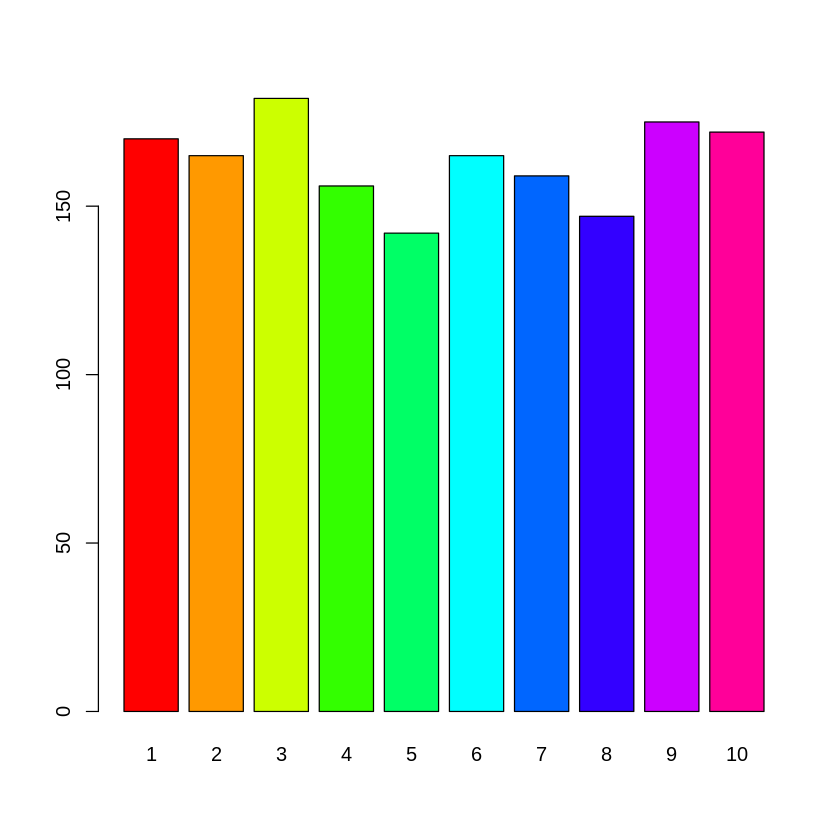

In [2]:
# 막대그래프 시각화
# names.arg : x축 레이블 표시, 대상은 벡터로 정의
barplot(heights, names.arg=c(1:10), col=rainbow(10))

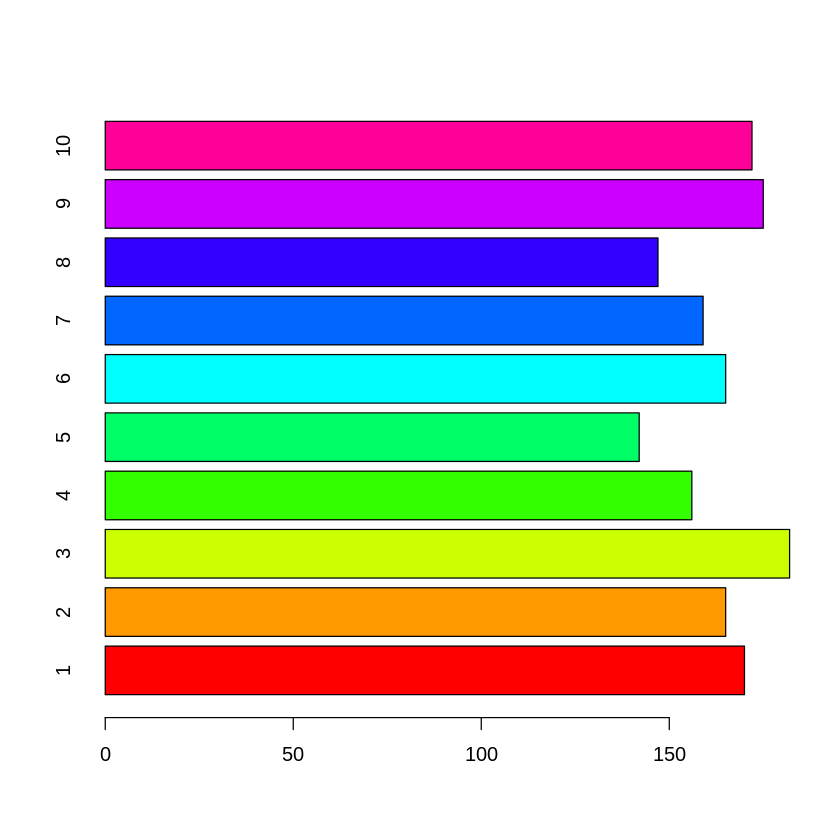

In [3]:
# horiz : 세로/가로 막대 그래프 여부 지정
barplot(heights, names.arg=c(1:10), col=rainbow(10), horiz=T)

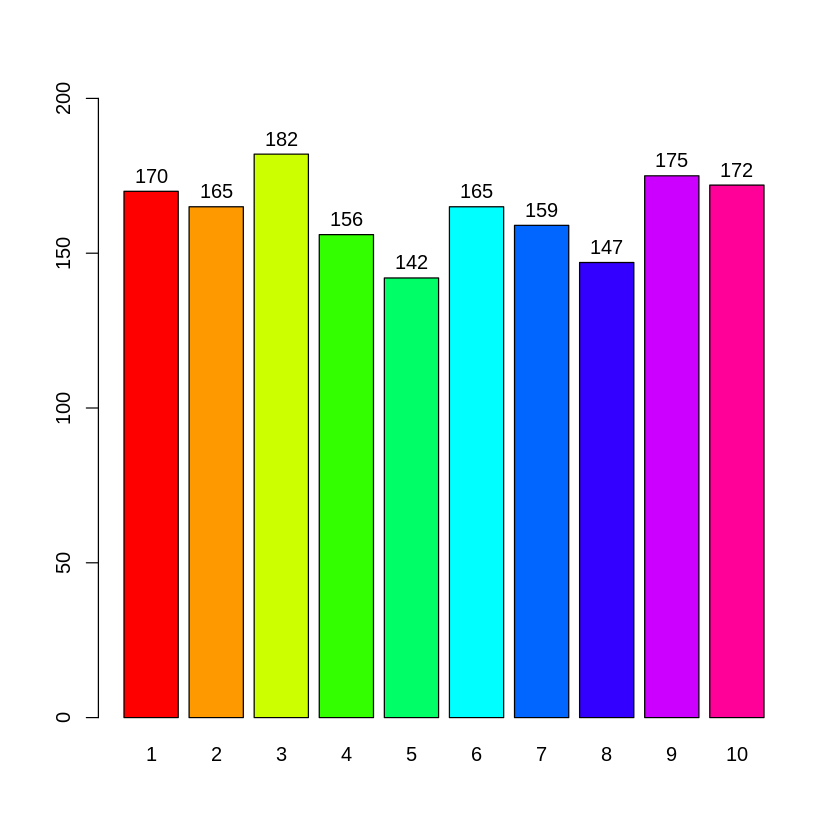

In [4]:
# text 함수로 막대그래프에 숫자 표시
bp <- barplot(heights, names.arg=c(1:10), col=rainbow(10), ylim=c(0,200))

text(bp, heights+5, lab=heights)

In [5]:
# mtcars 데이터셋 확인
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_N_o_t_e:

     Henderson and Velleman (1981) comment in a footnote to Table 1:
     ‘Hocking [original transcriber]'s noncrucial coding of the Mazda's
     rotary engine as a straight six-cylinder engine and the Porsche's
     flat engine as a V engine, as well as the inclusion of the diesel
     Mercedes 240D, have been retained to enable direct comparisons to
     be made with previous analyses.’

_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data", gap = 1/4)
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)
     ## possibly more meaningful, e.g., for summary() or bivariate plots:
     mtcars2 <- within(mtcars, {
        vs <- factor(vs, labels = c("V", "S"))
        am <- factor(am, labels = c("automatic", "manual"))
        cyl  <- ordered(cyl)
        gear <- ordered(gear)
        carb <- ordered(carb)
     })
     summary(mtcars2)

In [6]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [7]:
mtcars$gear <- as.factor(mtcars$gear)   # 기어수
mtcars$vs <- as.factor(mtcars$vs)       # 엔진종류(다기통/직렬)

In [8]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec       vs           am         gear  
 Min.   :2.760   Min.   :1.513   Min.   :14.50   0:18   Min.   :0.0000   3:15  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1:14   1st Qu.:0.0000   4:12  
 Median :3.695   Median :3.325   Median :17.71          Median :0.0000   5: 5  
 Mean   :3.597   Mean   :3.217   Mean   :17.85          Mean   :0.4062         
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90          3rd Qu.:1.0000         
 Max.   :4.930   Max.   :5.424   Max.   :22.90          Max.   :1

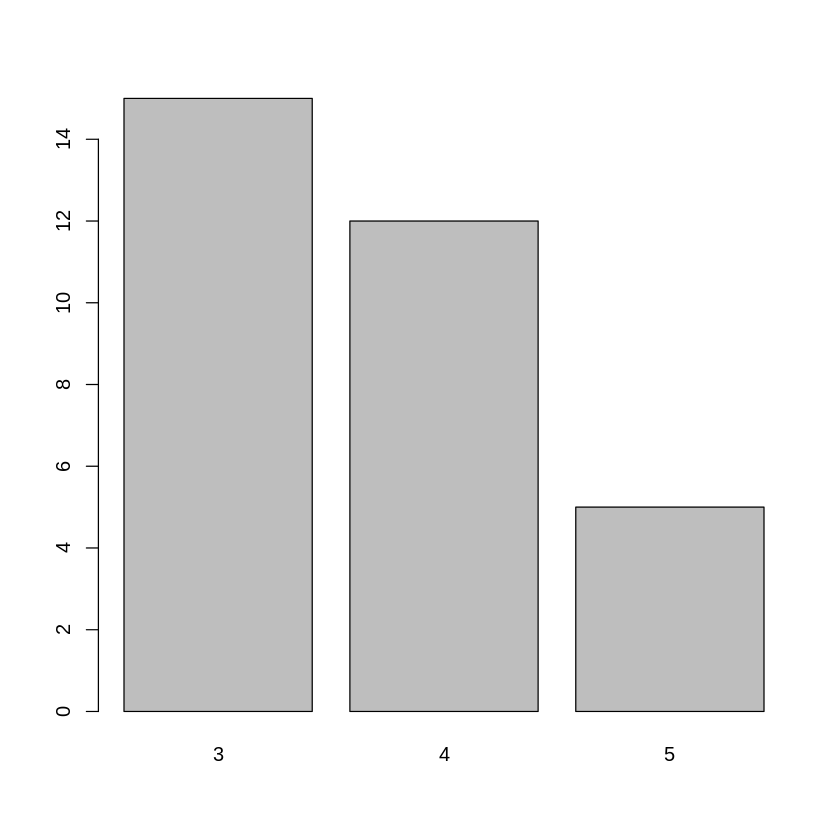

In [9]:
# 자동차 성능 지표 데이터에서 기어수gear, 엔진종류vs 시각화
barplot(table(mtcars$gear))

## 누적막대 그래프 : stacked bar plot
+ 주 범주와 하위 범주간에 존재하는 양적 관계를 보여줌
+ 범주별 데이터를 비교하여 각 범주의 차이를 한눈에 파악할 수 있게 시각화

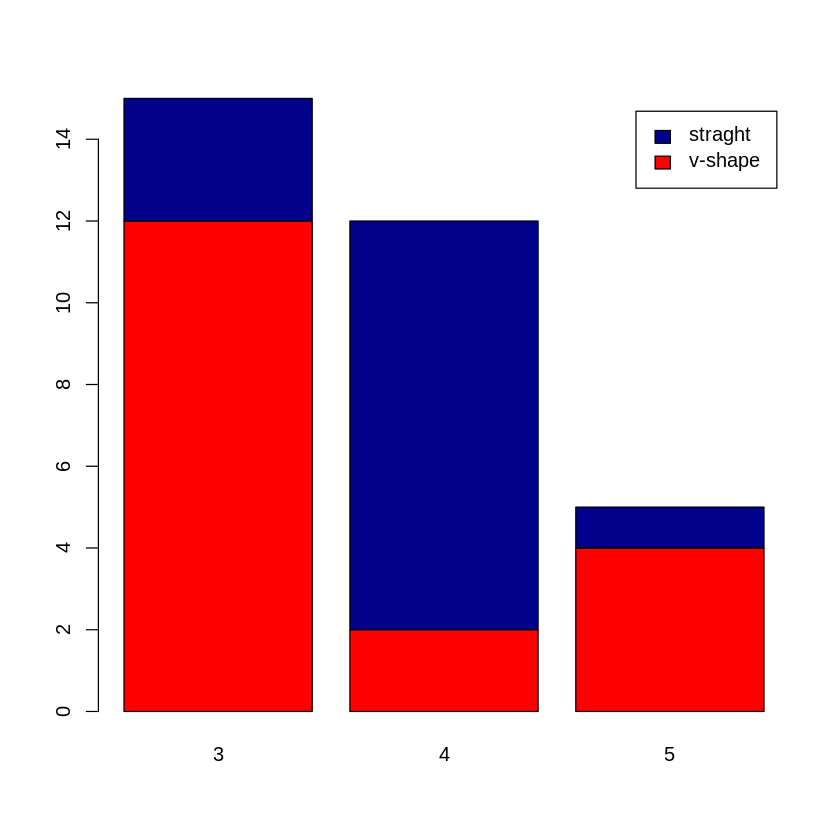

In [10]:
# 자동차 성능 지표 데이터에서 기어수gear, 엔진종류vs 시각화

# 엔진종류별 기어수 시각화 : groupby
counts <- table(mtcars$vs, mtcars$gear)
barplot(counts, col=c('red','darkblue'),
       legend=c('v-shape','straght'))

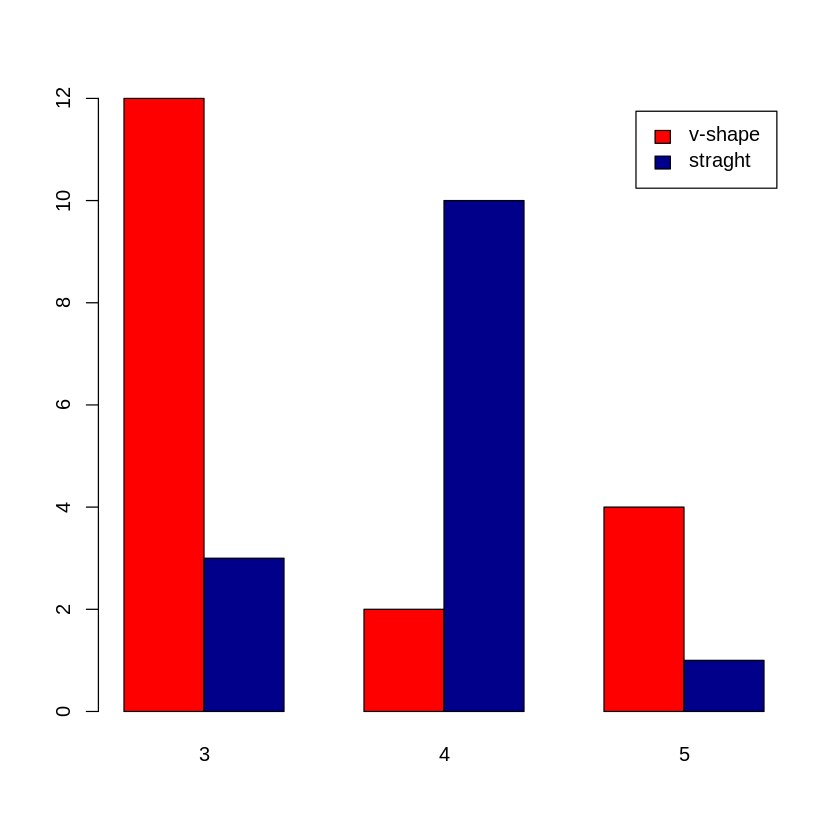

In [11]:
# 그룹막대 그래프 : grouped bar plot
barplot(counts, col=c('red','darkblue'),
       legend=c('v-shape','straght'), beside=T)

In [13]:
# 타이타닉 데이터셋을 이용해서 막대그래프 작성
titanic <- read.csv('csv/titanic.csv')
str(titanic)

'data.frame':	1310 obs. of  11 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ name    : Factor w/ 1308 levels "","Abbing, Mr. Anthony",..: 23 25 26 27 28 32 47 48 52 56 ...
 $ sex     : Factor w/ 3 levels "","female","male": 2 3 2 3 2 3 2 3 2 3 ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : Factor w/ 930 levels "","110152","110413",..: 189 51 51 51 51 126 94 17 78 827 ...
 $ fare    : num  211 152 152 152 152 ...
 $ cabin   : Factor w/ 187 levels "","A10","A11",..: 45 81 81 81 81 151 147 17 63 1 ...
 $ embarked: Factor w/ 4 levels "","C","Q","S": 4 4 4 4 4 4 4 4 4 2 ...


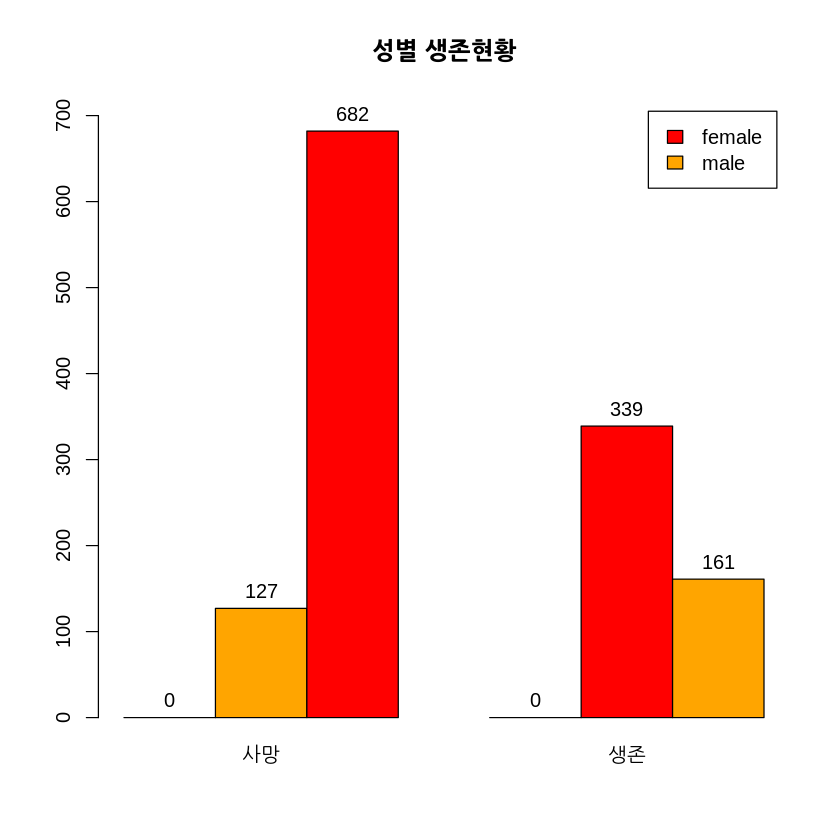

In [14]:
# 성별sex 생존자수를 막대그래프로 작성
gs <- table(titanic$sex, titanic$survived)
bp <- barplot(gs, main='성별 생존현황', ylim=c(0,720), col=c('red','orange'),
              names.arg=c('사망','생존'), beside=T, legend=c('female','male'))
text(bp, gs+20, lab=gs)

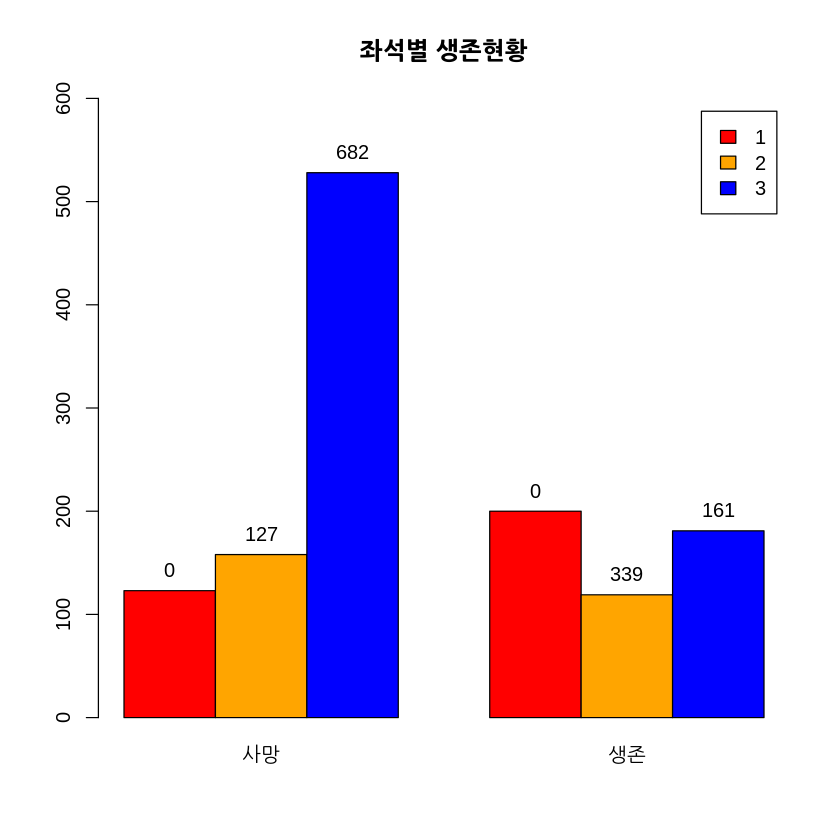

In [15]:
# 좌석별pclass 생존자수를 막대그래프로 작성
ps <- table(titanic$pclass, titanic$survived)
bp <- barplot(ps, main='좌석별 생존현황', ylim=c(0,600), col=c('red','orange','blue'),
              names.arg=c('사망','생존'), beside=T, legend=c('1','2','3'))
text(bp, ps+20, lab=gs)

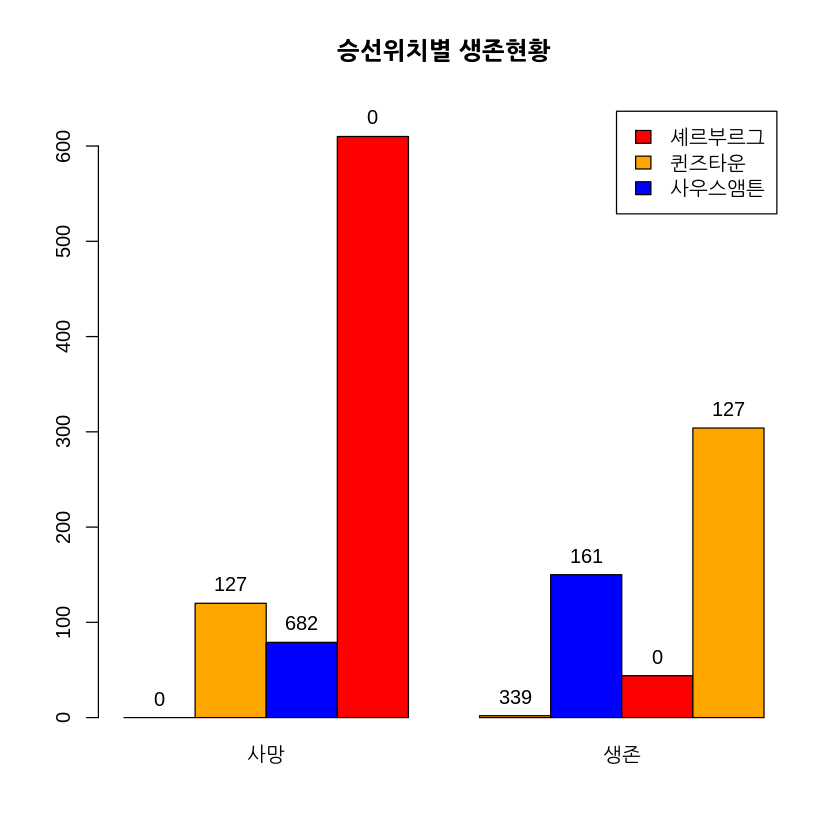

In [16]:
# 승선위치별embarked 생존자수를 막대그래프로 작성
es <- table(titanic$embarked, titanic$survived)
bp <- barplot(es, main='승선위치별 생존현황', ylim=c(0,650), col=c('red','orange','blue'),
              names.arg=c('사망','생존'), beside=T, legend=c('셰르부르그','퀸즈타운','사우스앰튼'))
text(bp, es+20, lab=gs)